In [1]:

# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.3
numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.4.1
sklearn: 1.0.2


In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
names = [ '0','1','2','3','4','5','6','7','8','9','10',
		'11','12','13','14','15','16','17','18','19','20',
		'21','22','23','24','25','26','27','28','29','30',
		'31','32','33','34','35','36','37','38','39','40',
		'41','42','43','44','45','46','47','48','49','50',
		'51','52','53','54','55','56','57','58','59','class']
dataset = read_csv(url, names=names)

In [4]:
# shape
print(dataset.shape)

(208, 61)


In [5]:
# head
print(dataset.head(1))

      0       1       2       3       4       5       6       7       8  \
0  0.02  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   

        9  ...      51      52      53      54      55     56      57     58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.018  0.0084  0.009   

       59  class  
0  0.0032      R  

[1 rows x 61 columns]


In [6]:
# descriptions
print(dataset.describe())

                0           1           2           3           4           5  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

                6           7           8           9  ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

In [79]:
# class distribution
print(dataset.groupby('class').size())

class
M    111
R     97
dtype: int64


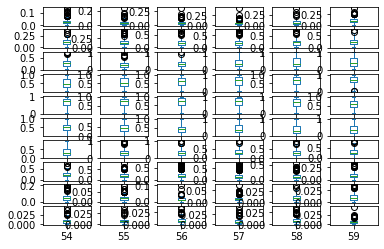

In [112]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(10,6), sharex=False , sharey= False )
pyplot.show()

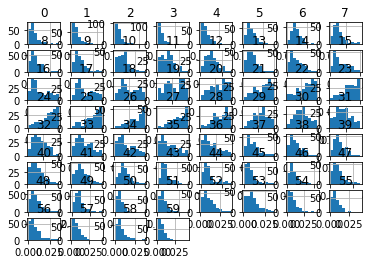

In [97]:
# histograms
dataset.hist()
pyplot.show()

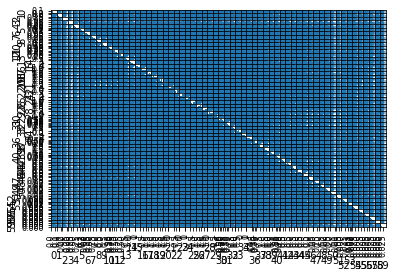

In [101]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [102]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60]
y = array[:,60]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [108]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.752574 (0.094851)
LDA: 0.699632 (0.103883)
KNN: 0.813603 (0.095561)
CART: 0.711397 (0.111988)
NB: 0.692647 (0.096562)
SVM: 0.548529 (0.020457)


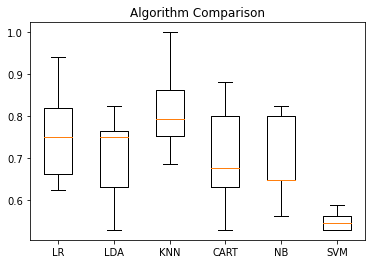

In [109]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [113]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [115]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7142857142857143
[[16  4]
 [ 8 14]]
              precision    recall  f1-score   support

           M       0.67      0.80      0.73        20
           R       0.78      0.64      0.70        22

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.72      0.71      0.71        42

